---
<h1><B> Fraud Analytics (CS6890)  </h1></B></center>

---

<table>
<tr> 
<td><h3> Assignment: </td>
<td><h3> 5 </td>
</tr>
<tr> 
<td><h3> Title : </td>
<td><h3> Synthetic data generation using Variational Autoencoder </td>
</tr>
<tr> 
<td><h3> Team Details : </td>
<td>

<table>
<tr>
<th> <h3> Name </th>
<th> <h3> Roll Number </th>
</tr>



<tr> 
<td><h5> Yug Patel </td>
<td><h5> CS23MTECH14019 </td>
</tr>
<tr> 
<td><h5> Hrishikesh Hemke </td>
<td><h5> CS23MTECH14003 </td>
</tr>
<tr> 
<td><h5> Manan Patel </td>
<td><h5> CS23MTECH14006 </td>
</tr>
<tr> 
<td><h5> Shreesh Gupta </td>
<td><h5> CS23MTECH12009 </td>
</tr>
<tr> 
<td><h5> Bhargav Patel </td>
<td><h5> CS23MTECH11026 </td>
</tr>

<table>



</td>
</tr>
<table>

##  Exploratory Data Analysis

### Importing Required Modules

In [103]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Lambda, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras import backend as K
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.losses import categorical_crossentropy
import matplotlib.pyplot as plt

### Checking for duplicate rows

In [102]:
credit_card_data = pd.read_csv('card_transaction.v1.csv')
credit_card_data[credit_card_data.duplicated()]

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
193878,13,0,2015,4,28,396,100.0,0,4487,725,71,49712.0,4829.0,17,0
195221,13,1,2006,7,19,454,100.0,2,4487,725,71,49712.0,4829.0,17,0
195330,13,1,2006,10,15,431,100.0,2,4487,725,71,49712.0,4829.0,17,0
244172,17,2,2011,12,12,986,120.0,2,4487,5722,3,86314.0,4829.0,17,0
1360769,109,2,1999,12,9,256,120.0,2,4487,2919,50,46323.0,4829.0,17,0
1373587,109,2,2019,3,8,262,120.0,0,4487,2919,50,46323.0,4829.0,17,0
2469536,205,2,2012,2,8,1053,82.0,2,12586,3305,91,11746.0,5541.0,19,0


### Checking for  Missing/ Null Values

In [64]:
credit_card_data.isnull().sum(axis=0)

User                    0
Card                    0
Year                    0
Month                   0
Day                     0
Time                    0
Amount                  1
Use Chip                1
Merchant Name           1
Merchant City           1
Merchant State     321041
Zip                338205
MCC                     1
Errors?           2515428
Is Fraud?               1
dtype: int64

In [65]:
credit_card_data[credit_card_data['Merchant State'].isnull()]['Merchant City'].value_counts()

Merchant City
 ONLINE    321040
Name: count, dtype: int64

In [66]:
credit_card_data[credit_card_data['Merchant City'] == ' ONLINE']['Merchant State'].value_counts()

Series([], Name: count, dtype: int64)

### Plots

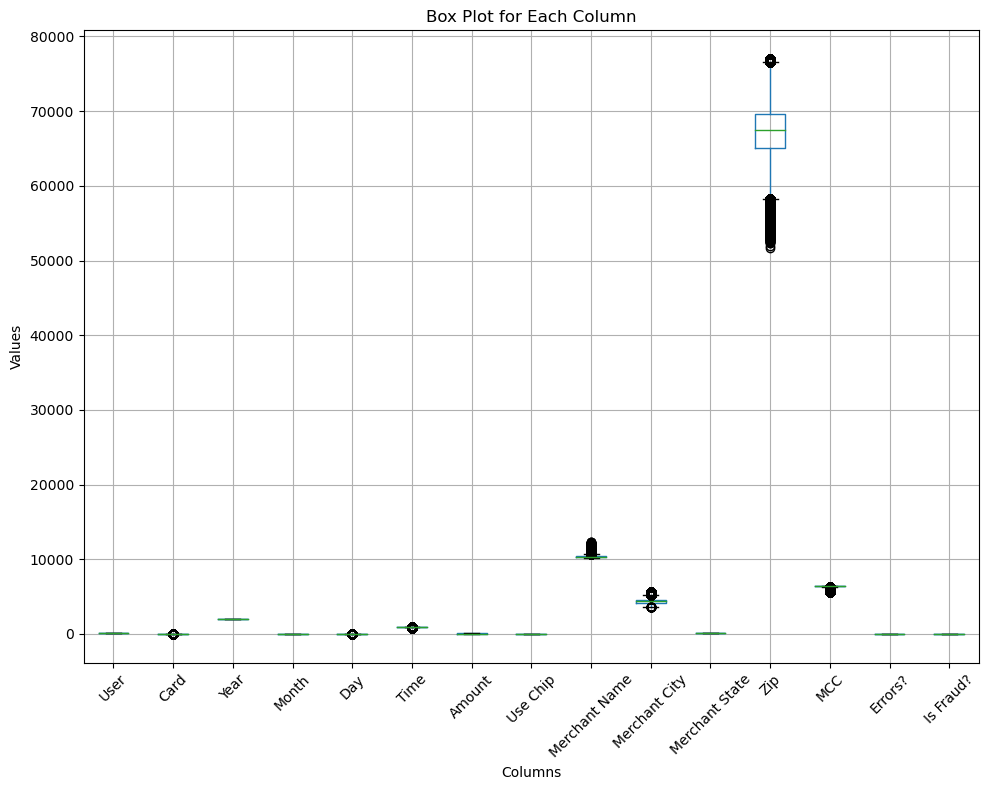

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset
# Replace df with your actual DataFrame name

# Define the columns for which you want to create box plots
columns_to_plot = ['User', 'Card', 'Year', 'Month', 'Day', 'Time', 'Amount', 'Use Chip', 
                   'Merchant Name', 'Merchant City', 'Merchant State', 'Zip', 'MCC', 'Errors?', 'Is Fraud?']

# Create a box plot for each column
plt.figure(figsize=(10, 8))
df[columns_to_plot].boxplot()
plt.xticks(rotation=45)
plt.title('Box Plot for Each Column')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

### Finding relation between the missing values and the observed data

### 'Merchant City' Vs 'Merchnat State'

- Missing values can be classified into three types: 
    - Missing at Random (MAR), 
    - Missing Completely at Random (MCAR), and 
    - Missing Not at Random (MNAR) 
</br>
</br>

- Upon analyzing our dataset, we identified that the missing values in the "Merchant City" column fall under the category of **Missing at Random (MAR)**.

- Specifically, for the ' ONLINE' category in Merchant City, all corresponding values in the Merchant State column were missing. To address this, we utilized a random constant imputation technique. This involved assigning a random constant value to all missing entries within the 'ONLINE' category of Merchant City. By doing so, we were able to uniformly impute the missing values in a consistent manner across this category.

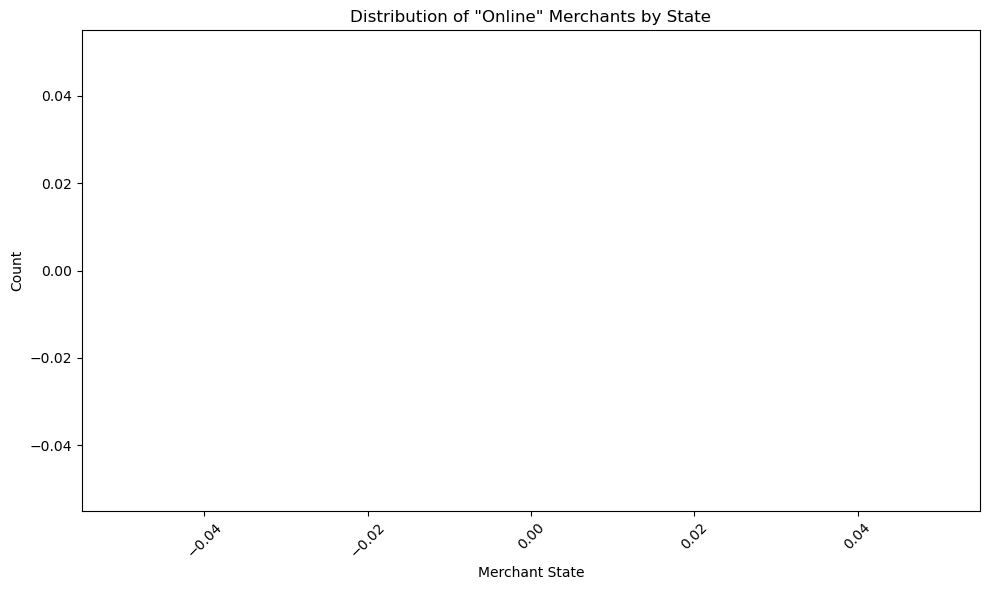

In [107]:
filtered_df = credit_card_data[credit_card_data['Merchant City'] == ' ONLINE']

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(filtered_df['Merchant State'], filtered_df['Merchant City'].count())
plt.xlabel('Merchant State')
plt.ylabel('Count')
plt.title('Distribution of "Online" Merchants by State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 'Merchant City' vs 'Zip'

- In our data analysis, we encountered a similar scenario when examining the "Merchant City" and "Zip" columns. It was evident that the absence of values in the "Zip" column correlated with various categories within the "Merchant City" column i.e **Missing as a Random (MAR) type**. Specifically, certain cities, including the 'ONLINE' category, exhibited missing values in their respective "Zip" entries.
</br></br>
- To tackle this issue, we first identified all unique categories within "Merchant City" that had missing "Zip" values. Subsequently, we assigned a distinct constant value to each of these identified categories. This approach aimed to establish a clear correlation between missing "Zip" values and specific "Merchant City" categories. We then utilized these unique constants to fill in the missing "Zip" entries, ensuring a consistent and systematic imputation method across different categories.

In [67]:
credit_card_data[credit_card_data['Zip'].isnull()]['Merchant City'].value_counts()

Merchant City
 ONLINE        321040
Cancun           1973
Rome             1247
Mexico City       945
London            791
                ...  
Vaduz               3
Palikir             3
Bratislava          2
Apia                1
Freetown            1
Name: count, Length: 114, dtype: int64

In [68]:
credit_card_data[credit_card_data['Merchant City'] == ' ONLINE']['Zip'].value_counts()

Series([], Name: count, dtype: int64)

In [69]:
missing_zip_categories = credit_card_data[credit_card_data['Zip'].isna()]['Merchant City'].unique()

In [70]:
missing_zip_categories.tolist()

[' ONLINE',
 'Zurich',
 'Tallinn',
 'Tokyo',
 'Cabo San Lucas',
 'Cancun',
 'Santo Domingo',
 'Beijing',
 'Lisbon',
 'Rome',
 'Manila',
 'Kingston',
 'Shanghai',
 'Toronto',
 'Paris',
 'Oslo',
 'Geneva',
 'Wellington',
 'Amsterdam',
 'Freetown',
 'Port au Prince',
 'Seoul',
 'Barcelona',
 'Algiers',
 'Cairo',
 'Jakarta',
 'Mexico City',
 'London',
 'Bogota',
 'Acapulco',
 'Johannesberg',
 'Nassau',
 'Singapore',
 'Islamabad',
 'Kuala Lumpur',
 'Ulan Bator',
 'Jerusalem',
 'Madrid',
 'Montreal',
 'Hong Kong',
 'Guatamala City',
 'Lima',
 'Guadalajara',
 'Bangkok',
 'Stockholm',
 'Tapei',
 'Karachi',
 'Berlin',
 'Prague',
 'Delhi',
 'Warsaw',
 'San Jose',
 'Copenhagen',
 'Mumbai',
 'Edinburgh',
 'Dhaka',
 'Skopje',
 'Abuja',
 'Funafuti',
 'Dublin',
 'Vatican City',
 'Bangalore',
 'Calgary',
 'Vilnius',
 'Port Moresby',
 'Brussels',
 'Puerto Vallarta',
 'Porto-Novo',
 'Zagreb',
 'Riyadh',
 'Riga',
 'Vienna',
 'Ljubljana',
 'Vancouver',
 'Istanbul',
 'Kolkata',
 'Saint Petersburg',
 'Athen

In [71]:
element_dict = {}
for index, element in enumerate(missing_zip_categories, start=1):
    element_dict[element] = index

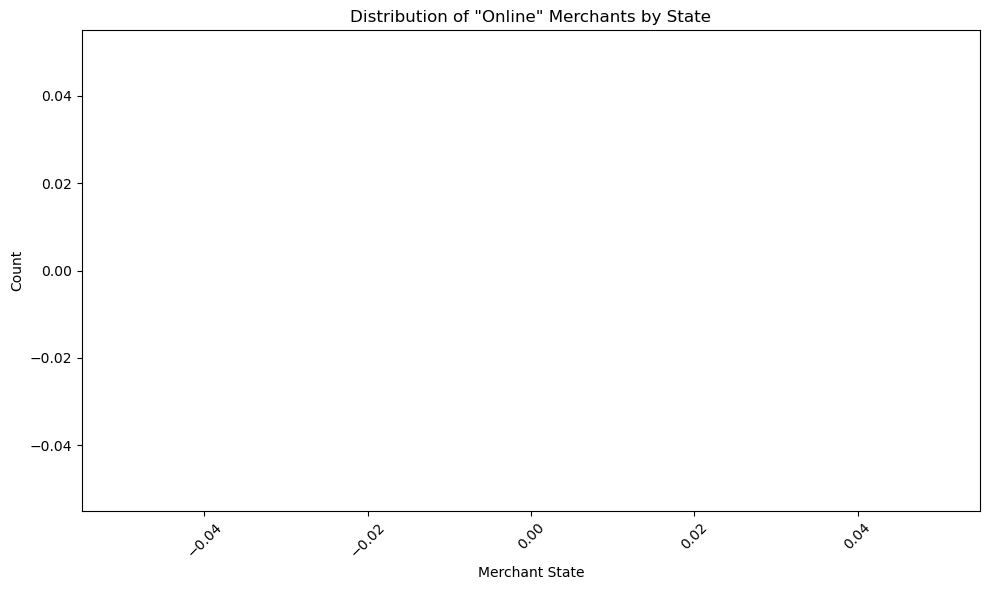

In [109]:
filtered_df1 = credit_card_data[credit_card_data['Zip'].isnull()]

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(filtered_df1['Zip'], filtered_df1['Merchant City'].count())
plt.xlabel('Merchant State')
plt.ylabel('Count')
plt.title('Distribution of "Online" Merchants by State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Imputing Missing Values 

- The missing values in the 'Amount', 'Use Chip', 'Merchant Name', 'Merchant City', 'MCC', and 'Is Fraud?' columns were addressed by employing a mode imputation technique. Since each of these columns had only one missing value and they were categorical in nature, filling the missing entries with the mode (most frequent value) of each column ensured that the dataset remained consistent and preserved the categorical information effectively. 

In [72]:
credit_card_data['Amount'].fillna(credit_card_data['Amount'].mode()[0], inplace=True)
credit_card_data['Use Chip'].fillna(credit_card_data['Use Chip'].mode()[0], inplace=True)
credit_card_data['Merchant Name'].fillna(credit_card_data['Merchant Name'].mode()[0], inplace=True)
credit_card_data['Merchant City'].fillna(credit_card_data['Merchant City'].mode()[0], inplace=True)
credit_card_data['MCC'].fillna(credit_card_data['MCC'].mode()[0], inplace=True)
credit_card_data['Is Fraud?'].fillna(credit_card_data['Is Fraud?'].mode()[0], inplace=True)

As discussed ealier:

- The missing values in the 'Merchant State' column were filled with the placeholder 'Unknown', ensuring that all entries had a valid state identifier. </br></br>

- For the 'Zip' column, a custom approach was applied. A dictionary mapping, named 'element_dict', was created to associate missing zip codes with their respective 'Merchant City' entries. This was done using a lambda function applied row-wise to the dataframe. If a zip code was missing (pd.isna(row['Zip'])), it was replaced with the corresponding value from 'element_dict' based on the 'Merchant City' entry. This method allowed for precise imputation of missing zip codes based on the known city information.</br></br>

- Missing values in the 'Errors?' column were replaced with 'No Error', assuming that a missing entry indicated no reported errors."


In [73]:
credit_card_data['Merchant State'].fillna('Unknown', inplace=True)
credit_card_data['Zip'] = credit_card_data.apply(lambda row: element_dict[row['Merchant City']] if pd.isna(row['Zip']) else row['Zip'], axis=1)
credit_card_data['Errors?'].fillna('No Error', inplace=True)

### Converting 'Time' to minutes since midnight.

In [75]:
# Function to convert time to minutes since midnight
def convert_time(time_str):
    try:
        t = pd.to_datetime(time_str, format='%H:%M')
        return t.hour * 60 + t.minute
    except:
        return 1;
 # Returns None for any incorrectly formatted time strings

# Apply the conversion function to the 'Time' column
credit_card_data['Time'] = credit_card_data['Time'].apply(convert_time)

### Preprocessing Results 

In [74]:
credit_card_data.isnull().sum()

User              0
Card              0
Year              0
Month             0
Day               0
Time              0
Amount            0
Use Chip          0
Merchant Name     0
Merchant City     0
Merchant State    0
Zip               0
MCC               0
Errors?           0
Is Fraud?         0
dtype: int64

In [76]:
credit_card_data

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,381,$134.09,Swipe Transaction,3.527213e+18,La Verne,CA,91750.0,5300.0,No Error,No
1,0,0,2002,9,1,402,$38.48,Swipe Transaction,-7.276121e+17,Monterey Park,CA,91754.0,5411.0,No Error,No
2,0,0,2002,9,2,382,$120.34,Swipe Transaction,-7.276121e+17,Monterey Park,CA,91754.0,5411.0,No Error,No
3,0,0,2002,9,2,1065,$128.95,Swipe Transaction,3.414527e+18,Monterey Park,CA,91754.0,5651.0,No Error,No
4,0,0,2002,9,3,383,$104.71,Swipe Transaction,5.817218e+18,La Verne,CA,91750.0,5912.0,No Error,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555185,215,0,2006,11,14,439,$55.43,Swipe Transaction,4.591017e+18,Whitehouse Station,NJ,8889.0,7349.0,No Error,No
2555186,215,0,2006,11,14,472,$7.23,Swipe Transaction,5.205100e+18,North Brunswick,NJ,8902.0,5812.0,No Error,No
2555187,215,0,2006,11,14,535,$79.07,Swipe Transaction,8.384250e+17,New York,NY,10001.0,4814.0,No Error,No
2555188,215,0,2006,11,14,667,$22.05,Swipe Transaction,5.205100e+18,North Brunswick,NJ,8902.0,5812.0,No Error,No


### Data Preprocessing and Encoding Categorical Variables 

- This code segment performs data preprocessing and encoding of categorical variables in the credit card transaction dataset. The 'Amount' column is converted to numeric format by removing the dollar sign. Categorical columns ('Use Chip', 'Merchant City', 'Merchant State', 'Errors?', 'Is Fraud?') are label encoded using scikit-learn's LabelEncoder. Additionally, the 'Merchant Name' column is converted from scientific notation to an integer format if necessary and then label encoded. Finally, the preprocessed data is saved to a new CSV file named 'card_transaction_processed.csv'.

In [77]:
# Convert 'Amount' to numeric after stripping the dollar sign
credit_card_data['Amount'] = credit_card_data['Amount'].replace('[\$,]', '', regex=True).astype(float)

# Label encode categorical columns

categorical_columns = ['Use Chip', 'Merchant City', 'Merchant State', 'Errors?', 'Is Fraud?']
encoders = {col: LabelEncoder() for col in categorical_columns}
for column in categorical_columns:
    credit_card_data[column] = encoders[column].fit_transform(credit_card_data[column].astype(str))

# Convert 'Merchant Name' from scientific notation to integer if needed and label encode
# This depends on whether 'Merchant Name' is a floating point representation or an anonymized string
# Here is a generic approach if 'Merchant Name' is indeed a large floating-point number
encoder['Merchant Name'] = LabelEncoder()
credit_card_data['Merchant Name'] = credit_card_data['Merchant Name'].apply(lambda x: format(x, 'f'))
credit_card_data['Merchant Name'] = label_encoder.fit_transform(credit_card_data['Merchant Name'])

# Save the preprocessed data to a new CSV file
credit_card_data.to_csv('card_transaction_processed.csv', index=False)

print("Data preprocessing complete. The processed data is saved to 'card_transaction_processed.csv'.")

Data preprocessing complete. The processed data is saved to 'card_transaction_processed.csv'.


## Varational Autoencoder for Finance-Tabular synthetic data generation


- The architecture of the VAE that we have used is visulaized below:

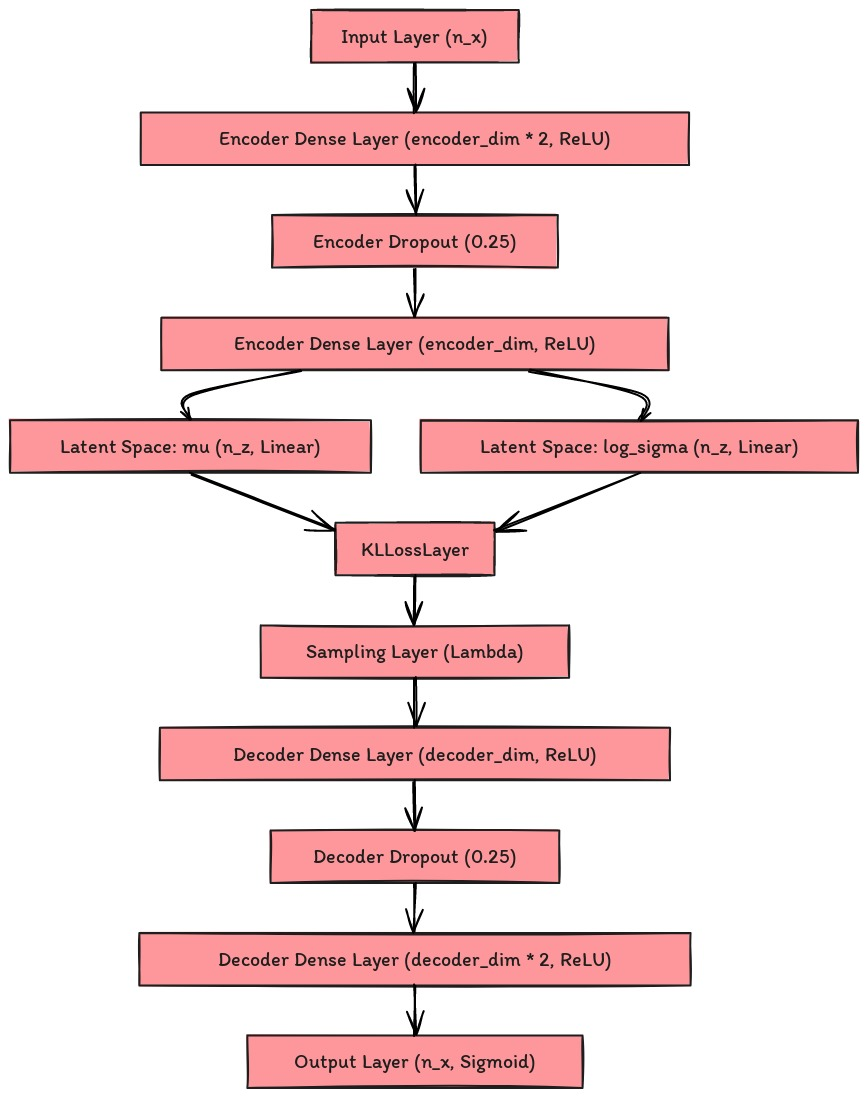


### Normalizing data for a good life

- This code loads data, splits it into training/validation sets, and standardizes numeric columns for machine learning preprocessing.

In [79]:
# Load the data
data = pd.read_csv('card_transaction_processed.csv')

# Proceed with your preprocessing...
categorical_columns = ['Use Chip', 'Merchant City', 'Merchant State', 'Zip', 'MCC', 'Errors?','Year', 'Month', 'Day','User','Card','Is Fraud?']
numeric_cols = ['Time', 'Amount', 'Merchant Name']

X = data

# Split data into training and validation sets
X_train, X_valid = train_test_split(X, test_size=0.2, random_state=42)

# Initialize and apply scalers
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_valid_scaled = X_valid.copy()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid),columns=X_train.columns)

In [80]:
# Checking for NaN values in the dataset
print(X_train_scaled.isnull().sum())
print('----------------------')
print(X_valid_scaled.isnull().sum())

User              0
Card              0
Year              0
Month             0
Day               0
Time              0
Amount            0
Use Chip          0
Merchant Name     0
Merchant City     0
Merchant State    0
Zip               0
MCC               0
Errors?           0
Is Fraud?         0
dtype: int64
----------------------
User              0
Card              0
Year              0
Month             0
Day               0
Time              0
Amount            0
Use Chip          0
Merchant Name     0
Merchant City     0
Merchant State    0
Zip               0
MCC               0
Errors?           0
Is Fraud?         0
dtype: int64


### The CRUX!! 

- This code defines a Variational Autoencoder (VAE) with custom layers for KL loss computation, utilizing a more complex architecture with dropout regularization and advanced decoder layers. The VAE loss combines reconstruction loss with the KL divergence added by the custom layer, and the model is compiled with an Adam optimizer and specified learning rate for training.

**The objection Function:**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\text{VAE Loss} = \text{Reconstruction Loss} + \text{KL Divergence Loss}$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\text{KL Divergence Loss} = -0.5 \sum_{j=1}^{n_z} (1 + \log(\sigma_j^2) - \mu_j^2 - \sigma_j^2)$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\text{Reconstruction Loss} = \frac{1}{N} \sum_{i=1}^{N} (y_{\text{true}}^{(i)} - y_{\text{pred}}^{(i)})^2
$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ \small Where:$\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $N$ be the number of samples in the batch.\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $y_{\text{true}}(i)$ be the true output for the $i$-th sample.\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $y_{\text{pred}}(i)$ be the predicted output for the $i$-th sample.


In [81]:
# Hyperparameters
m = 1000  # batch size
n_z = 2  # latent space size
encoder_dim = 5  # dim of encoder hidden layer
decoder_dim = 5  # dim of decoder hidden layer
n_x = X_train_scaled.shape[1]  # Input dimension
n_y = 1  # Output dimension for label (fraud/not fraud as additional input to the decoder)

from tensorflow.keras.layers import Layer

class KLLossLayer(Layer):
    """ Custom layer to compute KL loss """
    def __init__(self, **kwargs):
        super(KLLossLayer, self).__init__(**kwargs)

    def call(self, inputs):
        mu, log_sigma = inputs
        kl_loss = -0.5 * K.sum(1 + log_sigma - K.square(mu) - K.exp(log_sigma), axis=-1)
        self.add_loss(K.mean(kl_loss))  # Add KL divergence to the model's loss
        return inputs


# Redefine VAE with a more complex architecture
inputs = Input(shape=(n_x,))
encoder_h = Dense(encoder_dim*2, activation='relu')(inputs)
encoder_h = Dropout(0.25)(encoder_h)  # Add dropout for regularization
encoder_h = Dense(encoder_dim , activation='relu')(encoder_h)  # Increase complexity
mu = Dense(n_z, activation='linear')(encoder_h)
log_sigma = Dense(n_z, activation='linear')(encoder_h)

# Sampling function
def sample_z(args):
    mu, log_sigma = args
    eps = K.random_normal(shape=(K.shape(mu)[0], n_z), mean=0., stddev=1.)
    return mu + K.exp(log_sigma / 2) * eps

# Use Lambda layer for sampling
z = Lambda(sample_z, output_shape=(n_z,))([mu, log_sigma])

# KL loss layer added
mu, log_sigma = KLLossLayer()([mu, log_sigma])

# More complex decoder
decoder_h = Dense(decoder_dim , activation='relu')(z)
decoder_h = Dropout(0.25)(decoder_h)  # Add dropout for regularization
decoder_h = Dense(decoder_dim*2, activation='relu')(decoder_h)
y_pred = Dense(n_x, activation='sigmoid')(decoder_h)

# VAE model
vae = Model(inputs, y_pred)

# Define the VAE loss (only reconstruction loss here since KL loss is added by the custom layer)
def vae_loss(y_true, y_pred,alpha =0.1):
    reconstruction_loss = K.mean(K.square(y_true - y_pred))
#     reconstruction_loss = K.mean(categorical_crossentropy(y_true, y_pred))
    return  reconstruction_loss


# Example usage:

# Compile the VAE
# Adjust learning rate
vae.compile(optimizer=Adam(learning_rate=0.0001), loss=vae_loss)


In [82]:
vae.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 15)]                 0         []                            
                                                                                                  
 dense_7 (Dense)             (None, 10)                   160       ['input_3[0][0]']             
                                                                                                  
 dropout_2 (Dropout)         (None, 10)                   0         ['dense_7[0][0]']             
                                                                                                  
 dense_8 (Dense)             (None, 5)                    55        ['dropout_2[0][0]']           
                                                                                            

### Training  
-  The code creates a learning rate scheduler in TensorFlow for dynamic adjustment of the learning rate during training. It utilizes an exponential decay strategy after an initial phase to fine-tune the learning rate. This technique aids in optimizing the training process and enhancing model convergence

In [83]:
import tensorflow as tf

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        # Compute the new learning rate
        new_lr = lr * tf.math.exp(-0.1).numpy()  # Convert tensor to numpy then to Python float
        return float(new_lr)  # Ensure the return type is float

# Create the learning rate scheduler callback
lr_scheduler = LearningRateScheduler(scheduler)

# Now, use this callback in your model training
history = vae.fit(X_train_scaled, X_train_scaled,
                  batch_size=m,
                  epochs=50,
                  verbose=1,
                  validation_data=(X_valid_scaled, X_valid_scaled),
                  callbacks=[EarlyStopping(patience=5), lr_scheduler])

Epoch 1/50
2045/2045 [==============================] - 15s 6ms/step - loss: 1.1084 - val_loss: 0.9921 - lr: 1.0000e-04
Epoch 2/50
2045/2045 [==============================] - 12s 6ms/step - loss: 0.9920 - val_loss: 0.9630 - lr: 1.0000e-04
Epoch 3/50
2045/2045 [==============================] - 11s 6ms/step - loss: 0.9694 - val_loss: 0.9428 - lr: 1.0000e-04
Epoch 4/50
2045/2045 [==============================] - 10s 5ms/step - loss: 0.9557 - val_loss: 0.9328 - lr: 1.0000e-04
Epoch 5/50
2045/2045 [==============================] - 12s 6ms/step - loss: 0.9475 - val_loss: 0.9256 - lr: 1.0000e-04
Epoch 6/50
2045/2045 [==============================] - 12s 6ms/step - loss: 0.9421 - val_loss: 0.9210 - lr: 1.0000e-04
Epoch 7/50
2045/2045 [==============================] - 12s 6ms/step - loss: 0.9387 - val_loss: 0.9180 - lr: 1.0000e-04
Epoch 8/50
2045/2045 [==============================] - 12s 6ms/step - loss: 0.9362 - val_loss: 0.9155 - lr: 1.0000e-04
Epoch 9/50
2045/2045 [==================

### Training v/s Validation Loss
- This code snippet visualizes the training and validation loss over epochs, helping to analyze the model's performance and convergence during training.

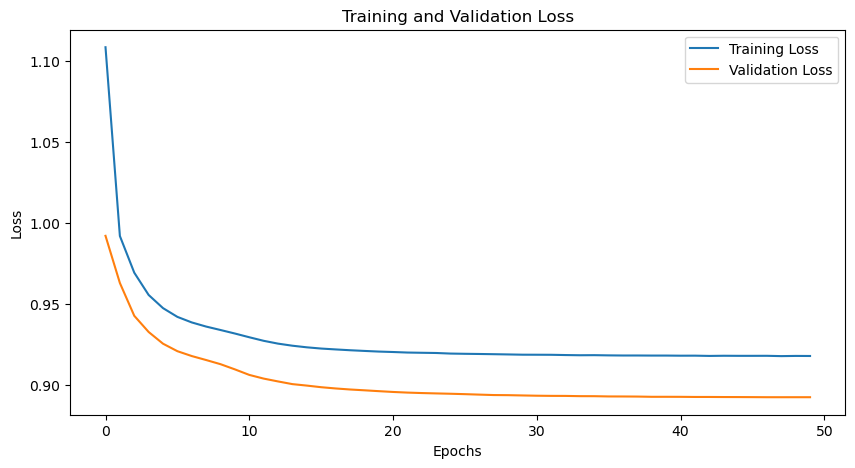

In [84]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Encoder Model Creation and Data Transformation
- The code defines an encoder model using layers from an existing Variational Autoencoder (VAE) model. It extracts the latent representations of the input data by passing it through the encoder layers. The encoder_model is then used to transform the training data into the latent space, which is crucial for tasks like dimensionality reduction or feature extraction. 

In [ ]:
### Create a new input layer that matches the input dimension of the VAE
encoder_input = Input(shape=(n_x,), name='encoder_input')

# Reuse layers from the existing VAE model to define the encoder
x = encoder_input

# Apply each appropriate layer of the VAE to build up to the lambda_4 layer output
for layer in vae.layers[1:4]:  # This includes input_layer to dense_30
    x = layer(x)

# Now manually connect dense_31 and dense_32 from the output of dense_30
mu = vae.layers[4](x)
log_sigma = vae.layers[5](x)

# The lambda layer takes both mu and log_sigma as inputs
z = vae.layers[6]([mu, log_sigma])

# Create the encoder model that outputs the result from the lambda_4 layer
encoder_model = Model(inputs=encoder_input, outputs=x, name='encoder_model')

# Display the model summary to verify the architecture
encoder_model.summary()


# Now use this model to transform your data into the latent space
latent_representations = encoder_model.predict(X_train_scaled)


### Latent Space Visualization
- The code snippet creates a scatter plot to visualize the latent representations of data points in a 2-dimensional latent space. The points are colored based on their true category labels from y_train using same seed as used earlier for train/valid split. This visualization helps in understanding the clustering or distribution of data points in the latent space, which is essential for interpreting the learned representations in a VAE.

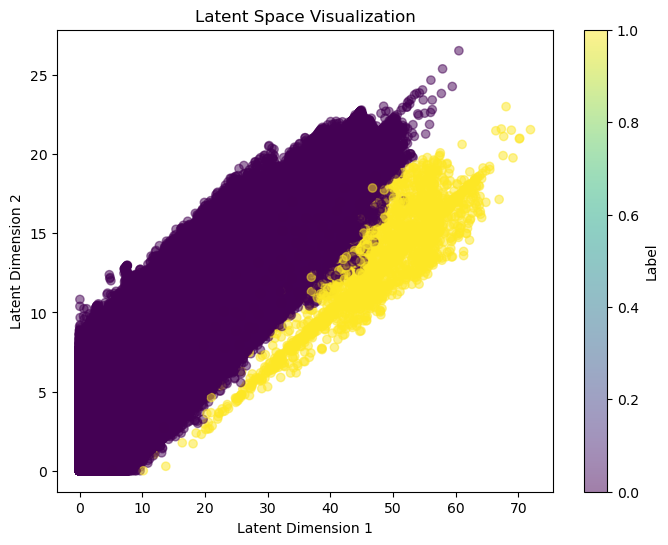

In [86]:
import matplotlib.pyplot as plt

# Assuming you have some labels in y_train to color the points according to their true category
# If you don't have such labels, you can simply plot without coloring
plt.figure(figsize=(8, 6))
# Separate features and target
X = data.drop('Is Fraud?', axis=1)
y = data['Is Fraud?']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
plt.scatter(latent_representations[:, 0], latent_representations[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.colorbar(label='Label')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('Latent Space Visualization')
plt.show()

### Synthetic Data Generation using VAE Decoder

- The code snippet defines a decoder model using the trained VAE model to generate synthetic data. It creates synthetic data points by sampling from the latent space and passing them through the decoder layers. The `generate_synthetic_data` function allows adjusting the temperature parameter for controlling the diversity of the generated data. This approach enables the generation of new data points similar to the original dataset, useful for augmenting data or generating synthetic examples for testing models.
### Justification for Synthetic Data Generation

Synthetic data generation using a Variational Autoencoder (VAE) decoder is a valuable technique in data science for several reasons:

1. **Data Augmentation:** It allows for increasing the size of the dataset by generating new data points that follow the same distribution as the original data. This can be particularly useful when dealing with limited data availability.

2. **Diversity Exploration:** By adjusting the temperature parameter, the diversity of the synthetic data can be controlled. Higher temperatures result in more diverse data, enabling exploration of different scenarios and edge cases.

3. **Model Testing:** Synthetic data can be used for testing machine learning models, especially in cases where obtaining real-world data is challenging or costly. It helps in evaluating the model's generalization and robustness.

4. **Privacy Preservation:** Synthetic data generation can also be used for privacy-preserving data sharing. It allows sharing insights or models without exposing sensitive or personally identifiable information present in the original dataset.

Overall, leveraging VAE-based synthetic data generation enhances data-driven workflows by providing additional data points for training, testing, and exploration while maintaining the underlying data characteristics.


In [87]:
from tensorflow.keras.models import Model

# Assuming `vae` is your trained model and you know the layer where the decoder starts
# For instance, if your decoder starts at layer 10:
decoder_input = Input(shape=(n_z,))
x = decoder_input

# Reapply each decoder layer
for layer in vae.layers[7:]:  # adjust the index 10 to where your decoder layers start
    x = layer(x)

decoder = Model(decoder_input, x)

# Now you can use this decoder to generate synthetic data
def generate_synthetic_data(decoder, num_samples, temperature=1.0):
    z_sample = np.random.normal(scale=temperature, size=(num_samples, n_z))  # Adjust scale
    synthetic_data = decoder.predict(z_sample)
    return synthetic_data

# Generate data with a higher temperature for more diversity
temperature = 0.75  # Lowering temperature might tighten the distribution
num_samples = 2000000  # Number of synthetic transactions to generate
synthetic_data = generate_synthetic_data(decoder, num_samples, temperature)

62500/62500 [==============================] - 107s 2ms/step


In [88]:
df_gen = pd.DataFrame(synthetic_data, columns=data.columns)
df_gen.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0.000067,0.995171,2.048981e-07,0.012143,0.002433,0.651233,0.073876,0.196313,0.020216,0.393636,8.888280e-09,0.680036,0.983487,0.002376,3.030441e-06
1,0.000278,0.988760,2.965598e-06,0.012659,0.003737,0.564943,0.059543,0.309353,0.062197,0.514693,2.808185e-07,0.778880,0.888442,0.006843,3.005181e-05
2,0.000003,0.979297,4.345837e-09,0.003396,0.067368,0.045733,0.006237,0.268728,0.072838,0.669541,2.461087e-10,0.874305,0.717457,0.000379,2.571826e-08
3,0.000009,0.998046,9.809742e-09,0.007216,0.001507,0.649788,0.054341,0.125381,0.013765,0.334280,2.091101e-10,0.620288,0.996136,0.000717,1.765471e-07
4,0.000189,0.992039,1.022046e-06,0.015412,0.003290,0.654292,0.085520,0.243257,0.026869,0.429281,6.509223e-08,0.710014,0.964197,0.004608,1.310921e-05


### Denormalization of Data

- The denormalization process involves reverting the scaled or normalized data back to its original scale, which is essential for interpreting and using the data correctly. In this code snippet, the `scaler.inverse_transform` function is applied to `df_gen`, which is assumed to be the original DataFrame before scaling. The resulting `denormalizedDf` DataFrame contains the denormalized data.
 

In [89]:
denormalizedDf = scaler.inverse_transform(df_gen)

# Assuming df_gen is your original DataFrame and 'denormalizedDf' is the numpy array returned by the scaler
denormalizedDf = pd.DataFrame(denormalizedDf, columns=df_gen.columns)

# Now you can use .head() on this DataFrame
denormalizedDf.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,102.066132,2.577117,2011.792358,6.562517,15.738690,974.997498,50.573677,1.544594,10345.616211,4410.770996,76.150848,67863.195312,6446.512695,18.946047,0.001177
1,102.079254,2.568495,2011.792358,6.564306,15.750158,948.481506,49.371899,1.641368,10614.139648,4713.875488,76.150856,71034.195312,6361.223145,18.949240,0.001178
2,102.062134,2.555768,2011.792358,6.532155,16.309546,788.932922,44.902348,1.606589,10682.201172,5101.589844,76.150841,74095.492188,6207.789551,18.944620,0.001177
3,102.062531,2.580983,2011.792358,6.545414,15.730554,974.553528,48.935707,1.483868,10304.354492,4262.151855,76.150841,65946.437500,6457.863281,18.944862,0.001177
4,102.073738,2.572905,2011.792358,6.573864,15.746228,975.937500,51.549957,1.584783,10388.167969,4500.019043,76.150848,68824.921875,6429.202637,18.947641,0.001177


### Rounding Values in DataFrame

- The code snippet uses `applymap` along with a lambda function to round each value in the `denormalizedDf` DataFrame. If the decimal part of a value is greater than or equal to 0.5, it is rounded up using `np.ceil`, otherwise it is rounded down using `np.floor`. This operation ensures that the data is rounded to the nearest integer for each value in the DataFrame.


In [90]:
df = denormalizedDf.applymap(lambda x: np.ceil(x) if x - np.floor(x) >= 0.5 else np.floor(x))

### KL Divergence Analysis

- The provided code defines a function `kl_divergence` to calculate the Kullback-Leibler (KL) divergence between two probability distributions. The `calculate_kl_divergence` function computes the KL divergence for each numerical column in two DataFrames `df1` and `df2`, assuming they are preprocessed and scaled. The resulting KL divergences are then visualized using a bar chart, showcasing the divergence between the distributions of the two datasets across different columns.


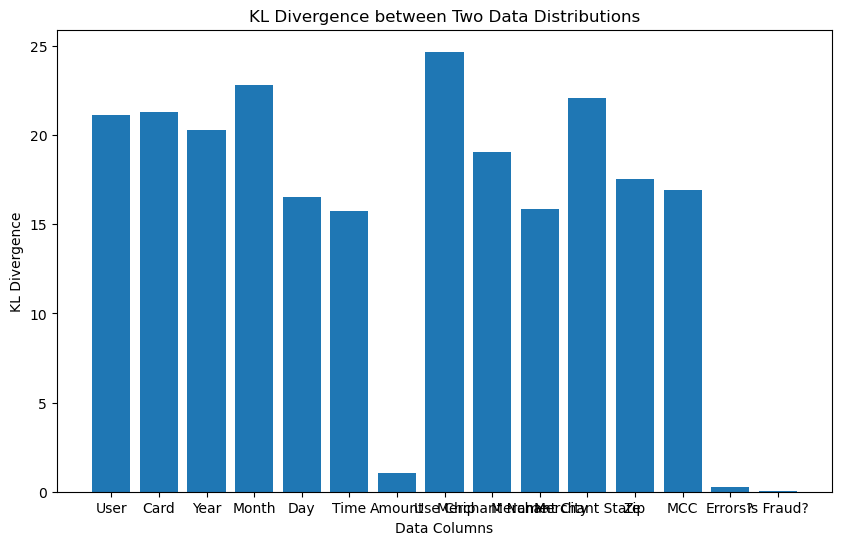

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the KL divergence function
def kl_divergence(p, q, eps=1e-10):
    p = np.array(p) + eps  # Add eps to p
    q = np.array(q) + eps  # Add eps to q
    
    p = p / np.sum(p)
    q = q / np.sum(q)
    
    return np.sum(p * np.log(p / q))


# Calculate KL divergence for each column in the DataFrames
def calculate_kl_divergence(df1, df2, bins=30):
    kl_divergences = {}
    for column in df1.columns:
        if df1[column].dtype != 'object' and df2[column].dtype != 'object':
            hist1, bin_edges = np.histogram(df1[column], bins=bins, density=True, range=(min(df1[column].min(), df2[column].min()), max(df1[column].max(), df2[column].max())))
            hist2, _ = np.histogram(df2[column], bins=bin_edges, density=True)
            kl_div = kl_divergence(hist1, hist2)
            kl_divergences[column] = kl_div
    return kl_divergences

X = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

# Calculate KL divergences
kl_divergences = calculate_kl_divergence(X, df_gen)

# Plotting the KL divergences
plt.figure(figsize=(10, 6))
plt.bar(kl_divergences.keys(), kl_divergences.values())
plt.xlabel('Data Columns')
plt.ylabel('KL Divergence')
plt.title('KL Divergence between Two Data Distributions')
plt.show()

### Decoding Categorical Data

- The provided code snippet decodes categorical data columns using inverse transformations from previously defined encoders. It iterates through each column in the DataFrame `data`, checks if the column is encoded, and performs the inverse transformation to retrieve the original labels. The resulting DataFrame `denormalizedDf_Labeled` contains the decoded categorical columns along with the unchanged numerical columns.


In [116]:
denormalizedDf_Labeled = pd.DataFrame()
for col in data.columns:
    try:
        if col in encoders:
            denormalizedDf_Labeled[col] = encoders[col].inverse_transform(df[col].astype(int))  # ensure the data type is appropriate for decoding
        else:
             denormalizedDf_Labeled[col] = df[col]
    except Exception as e:
        print(f"Error decoding {col}: {str(e)}")

In [117]:
# Convert numerical columns from float to int
denormalizedDf_Labeled['User'] = denormalizedDf_Labeled['User'].astype(int)
denormalizedDf_Labeled['Card'] = denormalizedDf_Labeled['Card'].astype(int)
denormalizedDf_Labeled['Year'] = denormalizedDf_Labeled['Year'].astype(int)
denormalizedDf_Labeled['Month'] = denormalizedDf_Labeled['Month'].astype(int)
denormalizedDf_Labeled['Day'] = denormalizedDf_Labeled['Day'].astype(int)
denormalizedDf_Labeled['Time'] = denormalizedDf_Labeled['Time'].astype(int)
denormalizedDf_Labeled['Amount'] = denormalizedDf_Labeled['Amount'].astype(int)
denormalizedDf_Labeled['Merchant Name'] = denormalizedDf_Labeled['Merchant Name'].astype(int)
denormalizedDf_Labeled['Zip'] = denormalizedDf_Labeled['Zip'].astype(int)
denormalizedDf_Labeled['MCC'] = denormalizedDf_Labeled['MCC'].astype(int)

In [119]:
# Convert 'Time' column to HH:MM format
denormalizedDf_Labeled['Time'] = pd.to_datetime(denormalizedDf_Labeled['Time'], unit='m').dt.strftime('%H:%M')

In [121]:
# Add '$' before every value in the 'Amount' column
denormalizedDf_Labeled['Amount'] = '$' + denormalizedDf_Labeled['Amount'].astype(str)

## Results

In [122]:
# Display the first few rows to verify decoding
denormalizedDf_Labeled.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,102,3,2012,7,16,16:15,$51,Swipe Transaction,10346,Melville,Macedonia,67863,6447,No Error,No
1,102,3,2012,7,16,15:48,$49,Swipe Transaction,10614,Mountain Grove,Macedonia,71034,6361,No Error,No
2,102,3,2012,7,16,13:09,$45,Swipe Transaction,10682,Ocoee,Macedonia,74095,6208,No Error,No
3,102,3,2012,7,16,16:15,$49,Online Transaction,10304,Marlboro,Macedonia,65946,6458,No Error,No
4,102,3,2012,7,16,16:16,$52,Swipe Transaction,10388,Milladore,Macedonia,68825,6429,No Error,No


### 1. Coarse grained

- The metric help gauge the level of similarity and uniqueness between the real and synthetic datasets, providing insights into the quality and diversity of the synthetic data generation process.

- It uses two foundations for evulation:
  1. **Direct Copy Percentage**
      - It calculates what percentage of the combined (real and synthetic) data is a direct copy of the real data.
      - $\text{Direct Copy Percentage} = \frac{\text{Total Data Size}}{\text{Number of Copies}} \times 100$
      - $\text{Here, "copies" refer to rows in the combined data that are not present in either the real or synthetic datasets, indicating direct replication.}$</br>
  2. **Self-Copy Percentage:**
      - It measures the percentage of duplicate rows (self-copies) within the synthetic data.
      - $\text{Self-Copy Percentage} = \frac{\text{Number of Duplicate Rows in Synthetic Data}}{\text{Total Synthetic Data Size}} \times 100$

      - This metric reveals how much of the synthetic data consists of repeated patterns or copies of existing rows within itself.


In [123]:
# Concatenate real and synthetic data
total_data = pd.concat([data, denormalizedDf_Labeled])

# Calculate the total number of duplicate rows in the concatenated data
dup_total = len(total_data) - len(total_data.drop_duplicates())

# Calculate the number of duplicate rows in the real data and synthetic data separately
dup_real = len(data) - len(data.drop_duplicates())
dup_synthetic = len(denormalizedDf_Labeled) - len(denormalizedDf_Labeled.drop_duplicates())

# Calculate the number of copies (duplicates not present in real or synthetic data)
copies = dup_total - dup_real - dup_synthetic

# Calculate the percentage of data that is a direct copy of the real data
copy_percentage = (copies / len(total_data)) * 100

# Calculate the percentage of self-copy (duplicate rows) in the synthetic data
self_copy_percentage = ((len(denormalizedDf_Labeled) - len(denormalizedDf_Labeled.drop_duplicates())) / len(denormalizedDf_Labeled)) * 100

print(f"Percentage of data that is a direct copy of the real data: {copy_percentage:.2f}%")
print(f"Percentage of data that is a self copy (duplicate rows): {self_copy_percentage:.2f}%")

Percentage of data that is a direct copy of the real data: 0.00%
Percentage of data that is a self copy (duplicate rows): 37.97%


### 2. Medium grained

- The "Medium grained" evaluation metric compares the distributions of real and synthetic data. This evaluation provides insights into how well the synthetic data replicates the distribution patterns of the real data across various features. By visualizing the distributions side by side, it helps assess the overall similarity or dissimilarity between the two datasets in terms of their statistical properties. This comparison can be crucial for understanding whether the synthetic data generation process accurately captures the underlying characteristics of the real data distribution.

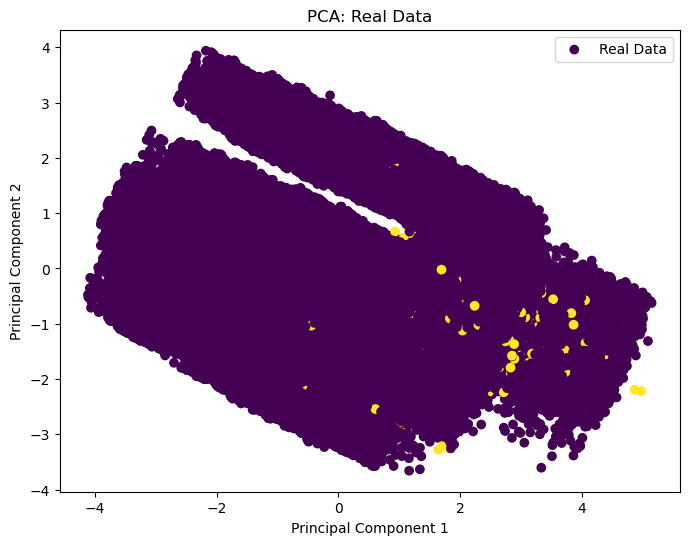

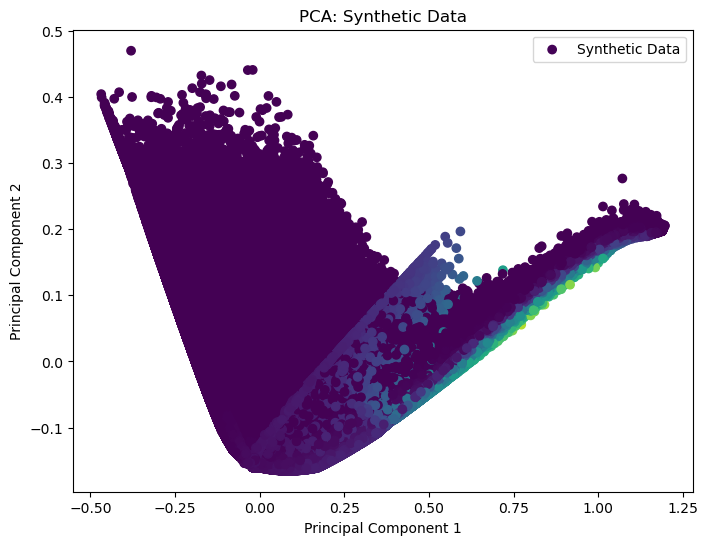

In [136]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_PCA_real = X_train_scaled.iloc[:,:-1]
y_PCA_real = X_train_scaled.iloc[:,-1]
# Initialize PCA for real data
pca_real = PCA(n_components=2)
# Fit and transform the real data
pca_real_result = pca_real.fit_transform(X_PCA_real)


X_PCA_syn = df_gen.iloc[:,:-1]
y_PCA_syn = df_gen.iloc[:,-1]

# Initialize PCA for synthetic data
pca_synthetic = PCA(n_components=2)
# Fit and transform the synthetic data
pca_synthetic_result = pca_synthetic.fit_transform(X_PCA_syn)

# Plot PCA results for real data
plt.figure(figsize=(8, 6))
plt.scatter(pca_real_result[:, 0], pca_real_result[:, 1], c=y_PCA_real, label='Real Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Real Data')
plt.legend()
plt.show()

# Plot PCA results for synthetic data
plt.figure(figsize=(8, 6))
plt.scatter(pca_synthetic_result[:, 0], pca_synthetic_result[:, 1], c=y_PCA_syn, label='Synthetic Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Synthetic Data')
plt.legend()
plt.show()


### 3. Fine grained 
- The "Fine grained" evaluation metric involves comparing the joined distributions of real and synthetic data. This metric goes beyond comparing individual feature distributions and focuses on the overall joint distribution of multiple features. By analyzing how well the joint distributions align between real and synthetic data, this evaluation provides a deeper understanding of the data generation process's fidelity. It helps identify any discrepancies or patterns that may not be apparent when examining individual features separately, thus offering a more comprehensive assessment of the synthetic data's quality and resemblance to real-world data.

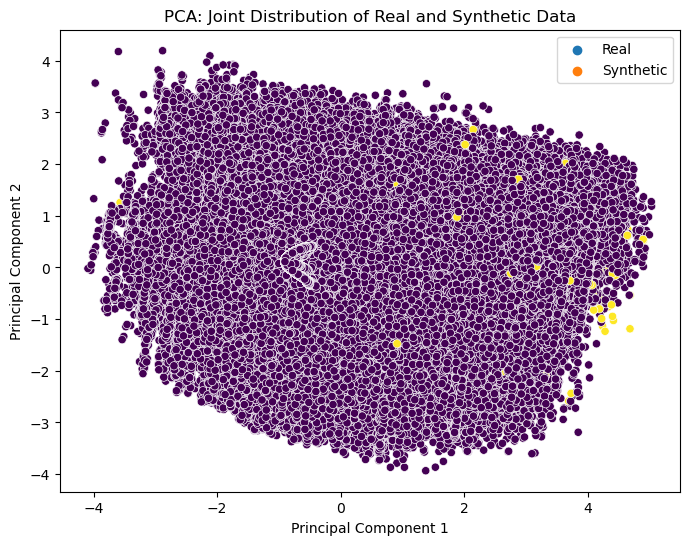

In [133]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Combine real and synthetic data for comparison
combined_data = pd.concat([X_train_scaled, df_gen], axis=0)

combined_data_X = combined_data.iloc[:,:-1]
combined_data_y = combined_data.iloc[:,-1]

# Initialize PCA for combined data
pca_combined = PCA(n_components=2)
# Fit and transform the combined data
pca_combined_result = pca_combined.fit_transform(combined_data_X)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_combined_result, columns=['PC1', 'PC2'])
pca_df['Data Type'] = ['Real' for _ in range(len(X_train_scaled.iloc[:,:-1]))] + ['Synthetic' for _ in range(len(df_gen.iloc[:,:-1]))]

# Plot joint distribution of real and synthetic data
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, c=combined_data_y, x='PC1', y='PC2', hue='Data Type')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Joint Distribution of Real and Synthetic Data')
plt.legend()
plt.show()